In [1]:
import pandas as pd
from google.cloud import storage
import os
import glob
import json

os.environ["GCLOUD_PROJECT"] = "newprojectnew-435415"



In [2]:
def download_bucket_with_transfer_manager(
    bucket_name, destination_directory="", workers=8, max_results=10000000
):
    """Download all of the blobs in a bucket, concurrently in a process pool.

    The filename of each blob once downloaded is derived from the blob name and
    the `destination_directory `parameter. For complete control of the filename
    of each blob, use transfer_manager.download_many() instead.

    Directories will be created automatically as needed, for instance to
    accommodate blob names that include slashes.
    """

    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"

    # The directory on your computer to which to download all of the files. This
    # string is prepended (with os.path.join()) to the name of each blob to form
    # the full path. Relative paths and absolute paths are both accepted. An
    # empty string means "the current working directory". Note that this
    # parameter allows accepts directory traversal ("../" etc.) and is not
    # intended for unsanitized end user input.
    # destination_directory = ""

    # The maximum number of processes to use for the operation. The performance
    # impact of this value depends on the use case, but smaller files usually
    # benefit from a higher number of processes. Each additional process occupies
    # some CPU and memory resources until finished. Threads can be used instead
    # of processes by passing `worker_type=transfer_manager.THREAD`.
    # workers=8

    # The maximum number of results to fetch from bucket.list_blobs(). This
    # sample code fetches all of the blobs up to max_results and queues them all
    # for download at once. Though they will still be executed in batches up to
    # the processes limit, queueing them all at once can be taxing on system
    # memory if buckets are very large. Adjust max_results as needed for your
    # system environment, or set it to None if you are sure the bucket is not
    # too large to hold in memory easily.
    # max_results=1000

    from google.cloud.storage import Client, transfer_manager

    storage_client = Client()
    bucket = storage_client.bucket(bucket_name)

    blob_names = [blob.name for blob in bucket.list_blobs(max_results=max_results)]

    results = transfer_manager.download_many_to_path(
        bucket, blob_names, destination_directory=destination_directory, max_workers=workers
    )

    for name, result in zip(blob_names, results):
        # The results list is either `None` or an exception for each blob in
        # the input list, in order.

        if isinstance(result, Exception):
            print("Failed to download {} due to exception: {}".format(name, result))
        else:
            print("Downloaded {} to {}.".format(name, destination_directory + name))

In [3]:
download_bucket_with_transfer_manager("sensor1data", destination_directory="/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/")


/opt/anaconda3/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloaded 2024-10-17T01:20:11+00:00_34df4c to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:20:11+00:00_34df4c.
Downloaded 2024-10-17T01:21:26+00:00_f1402c to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:21:26+00:00_f1402c.
Downloaded 2024-10-17T01:22:30+00:00_bdb0d8 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:22:30+00:00_bdb0d8.
Downloaded 2024-10-17T01:23:28+00:00_2c5a85 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:23:28+00:00_2c5a85.
Downloaded 2024-10-17T01:24:26+00:00_ba5f55 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:24:26+00:00_ba5f55.
Downloaded 2024-10-17T01:25:26+00:00_f27930 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:25:26+00:00_f27930.
Downloaded 2024-10-17T01:26:26+00:00_213278 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/file

In [4]:
path = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/' 
all_files = glob.glob(path + "2024*") 
all_files


['/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T18:07:05+00:00_a1a4ce',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T16:38:04+00:00_8f7610',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:30:54+00:00_593fb1',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T07:26:31+00:00_b03127',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T05:53:32+00:00_461c6f',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:48:54+00:00_5016ee',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/f

In [5]:
# Specify the directory containing the files
directory = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/'



# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Ensure it's a file
    if os.path.isfile(file_path):
        try:
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read().strip()

            # Handle empty files
            if content == '':
                print(f"File {file_path} is empty.")
                continue

            # Try to load the content as JSON
            try:
                json_data = json.loads(content)
            except json.JSONDecodeError:
                print(f"Invalid JSON in file {file_path}. Attempting to prepend bracket anyway.")
                # You might want to handle it differently or just prepend '{'
                json_data = None

            # Prepend '{' to the content
            new_content = '{' + content

            # Write the new content back to the file
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(new_content)

            print(f"Updated {file_path}.")

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

print("Done processing files.")


Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T18:07:05+00:00_a1a4ce. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T18:07:05+00:00_a1a4ce.
Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc.
Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9.
Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents

In [6]:
def read_large_files(directory, min_size_bytes):
    """Reads  files from a directory that are greater than a specified size."""

    dfs = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath) and os.path.getsize(filepath) > min_size_bytes:
            try:
                print(filepath)
                with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                    df = pd.read_json(file,lines=True)

            #df = pd.read_json(filepath, lines=True,encoding_errors='ignore')
                    dfs.append(df)
            except ValueError as e:
                print(f"Error reading {filename}: {e}")


    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return None

In [7]:
directory_path = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/'
min_file_size = 100  # bytes
fulldata = read_large_files(directory_path,min_file_size)

/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T18:07:05+00:00_a1a4ce
Error reading 2024-10-19T18:07:05+00:00_a1a4ce: Key name of object must be 'string' when decoding 'object'
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc
Error reading 2024-10-17T01:44:30+00:00_2e20cc: Key name of object must be 'string' when decoding 'object'
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9
Error reading 2024-10-17T15:17:23+00:00_c0e4e9: Key name of object must be 'string' when decoding 'object'
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48
Error reading 2024-10-17T04:32:30+00:00_91af48: Key name of object must be 'string' when decoding 'object'
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T16:38:04+00:00_8f7610
Error reading 2024-10-19T16:38:04+00:00_8f7610: Key name of object must 

In [8]:
#fulldata2 = pd.read_json('/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:26:26+00:00_213278',typ='series')
#fulldata

In [9]:
fulldata.columns

Index(['TS', 'MV', 'VV', 'VP', 'CWV', 'CBV', 'S1WV', 'S1BV', 'S2WV', 'S2BV',
       'P25', 'TMP', 'HUM'],
      dtype='object')

In [10]:
#fulldata = fulldata.set_index('datetime')
fulldata['datetime']=pd.to_datetime(fulldata.TS,errors='coerce')
fulldata_final = fulldata
fulldata_final

,TS,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM,datetime
0,2024-10-17T04:52:10,0.042938,0.192281,0.320469,0.205781,0.133094,0.135563,0.203406,0.0465,0.2645,0,22.3,31.9,2024-10-17 04:52:10


In [11]:
fulldata

,TS,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM,datetime
0,2024-10-17T04:52:10,0.042938,0.192281,0.320469,0.205781,0.133094,0.135563,0.203406,0.0465,0.2645,0,22.3,31.9,2024-10-17 04:52:10


In [12]:

#fulldata_sub = fulldata.sort_index().loc['2024-09-14' : '2024-09-24', :] 

#fulldata_sub = fulldata.sort_index()#.loc['2024-09-24 14:39:48':'2024-09-14 13:25:29']

#fulldata_sub = fulldata_sub.reset_index()
#fulldata_sub = fulldata_sub.dropna(subset=['datetime'])
#fulldata_final = fulldata_sub.drop(fulldata_sub.index[-63000:])
#fulldata_final



In [13]:
fulldata_final = fulldata_final.set_index('datetime')

hourly_avg_df = fulldata_final.resample('5min').mean(numeric_only=True)
hourly_avg_df


,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM
datetime,,,,,,,,,,,,
2024-10-17 04:50:00,0.042938,0.192281,0.320469,0.205781,0.133094,0.135563,0.203406,0.0465,0.2645,0.0,22.3,31.9


/opt/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/opt/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


(0.0, 10.0)

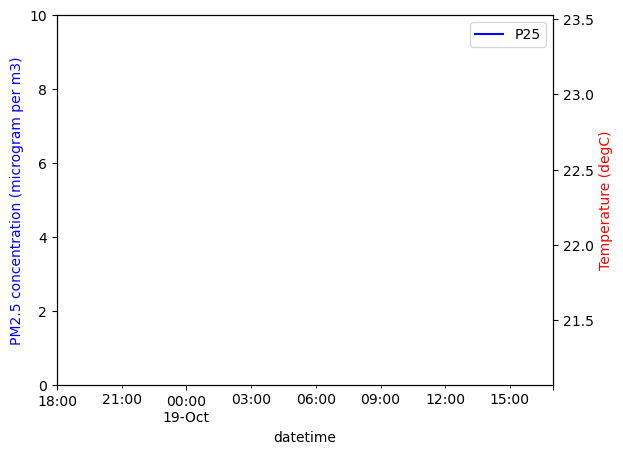

In [14]:
ax = hourly_avg_df.plot(y=['P25'],color='blue')
hourly_avg_df.plot(y=['TMP'],ax=ax,secondary_y=True,color='red')
ax.set_ylabel('PM2.5 concentration (microgram per m3)',color='blue')
ax.right_ax.set_ylabel('Temperature (degC)',color='red')
ax.legend(loc='upper right')
ax.set_xlim(['10-18-2024 18:00:00','10-19-2024 17:00:00'])
ax.set_ylim([0,10])


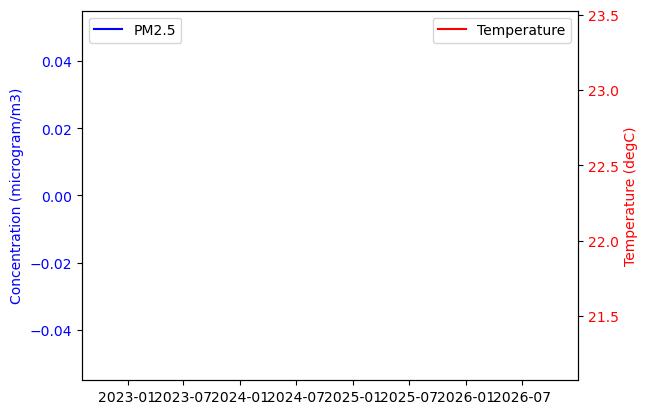

In [15]:
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots()

# Plot the first y-values
ax1.plot(hourly_avg_df.index, hourly_avg_df['P25'], color='blue', label='PM2.5')
ax1.set_ylabel('Concentration (microgram/m3)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second y-values
ax2.plot(hourly_avg_df.index, hourly_avg_df['TMP'], color='red', label='Temperature')
ax2.set_ylabel('Temperature (degC)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


In [16]:
#test

/opt/anaconda3/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloaded 2024-10-17T01:20:11+00:00_34df4c to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:20:11+00:00_34df4c.
Downloaded 2024-10-17T01:21:26+00:00_f1402c to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:21:26+00:00_f1402c.
Downloaded 2024-10-17T01:22:30+00:00_bdb0d8 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:22:30+00:00_bdb0d8.
Downloaded 2024-10-17T01:23:28+00:00_2c5a85 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:23:28+00:00_2c5a85.
Downloaded 2024-10-17T01:24:26+00:00_ba5f55 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:24:26+00:00_ba5f55.
Downloaded 2024-10-17T01:25:26+00:00_f27930 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:25:26+00:00_f27930.
Downloaded 2024-10-17T01:26:26+00:00_213278 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/file

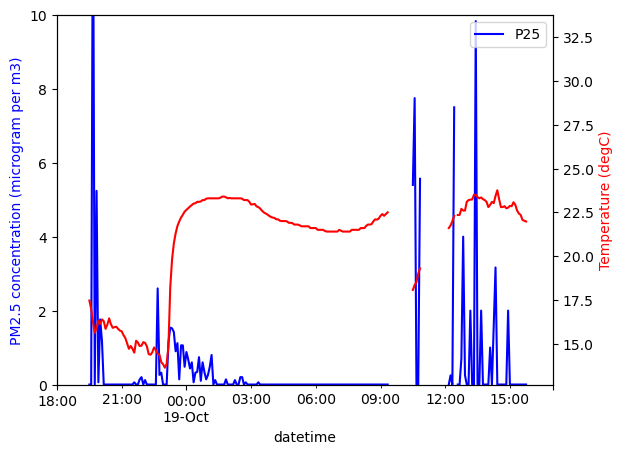

In [17]:
download_bucket_with_transfer_manager("sensor1data", destination_directory="/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/")
path = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/' 
all_files = glob.glob(path + "2024*") 

# Specify the directory containing the files
directory = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/'



# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Ensure it's a file
    if os.path.isfile(file_path):
        try:
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read().strip()

            # Handle empty files
            if content == '':
                print(f"File {file_path} is empty.")
                continue

            # Try to load the content as JSON
            try:
                json_data = json.loads(content)
            except json.JSONDecodeError:
                print(f"Invalid JSON in file {file_path}. Attempting to prepend bracket anyway.")
                # You might want to handle it differently or just prepend '{'
                json_data = None

            # Prepend '{' to the content
            new_content = '{' + content

            # Write the new content back to the file
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(new_content)

            print(f"Updated {file_path}.")

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

print("Done processing files.")


def read_large_files(directory, min_size_bytes):
    """Reads  files from a directory that are greater than a specified size."""

    dfs = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath) and os.path.getsize(filepath) > min_size_bytes:
            try:
                print(filepath)
                with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                    df = pd.read_json(file,lines=True)

            #df = pd.read_json(filepath, lines=True,encoding_errors='ignore')
                    dfs.append(df)
            except ValueError as e:
                print(f"Error reading {filename}: {e}")


    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return None
import matplotlib.pyplot as plt
directory_path = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/'
min_file_size = 100  # bytes
fulldata = read_large_files(directory_path,min_file_size)

#fulldata = fulldata.set_index('datetime')
fulldata['datetime']=pd.to_datetime(fulldata.TS,errors='coerce')
fulldata_final = fulldata

fulldata_final = fulldata_final.set_index('datetime')

hourly_avg_df = fulldata_final.resample('5min').mean(numeric_only=True)

ax = hourly_avg_df.plot(y=['P25'],color='blue')
hourly_avg_df.plot(y=['TMP'],ax=ax,secondary_y=True,color='red')
ax.set_ylabel('PM2.5 concentration (microgram per m3)',color='blue')
ax.right_ax.set_ylabel('Temperature (degC)',color='red')
ax.legend(loc='upper right')
ax.set_xlim(['10-18-2024 18:00:00','10-19-2024 17:00:00'])
ax.set_ylim([0,10])
plt.savefig('/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/aa.png')

In [18]:
#download_bucket_with_transfer_manager("sensor1data", destination_directory="/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/")

fil = sorted(glob.glob('/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/*'))
fil

['/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:20:11+00:00_34df4c',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:21:26+00:00_f1402c',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:22:30+00:00_bdb0d8',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:23:28+00:00_2c5a85',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:24:26+00:00_ba5f55',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:25:26+00:00_f27930',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:26:26+00:00_213278',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:27:25+00:00_864556',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:28:26+00:00_b8593b',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/f

In [19]:
import json
with open(fil[0], 'r') as file:
    data = json.load(file)

In [20]:
with open(fil[-1], 'r', encoding='utf-8') as file:
    content = file.read().strip()

In [21]:
content

'{"TS":"202�-10-19T16:05:27�."MV":0.027688,"WV":0.056844,"VP":0.09474,"CWV"�>.387531,"CBV":0.<2675,"S1WV":0�>26437,"S1BV":0.<57344,"S2WV":0.?285,"S2BV":0.3�<219,"P25":0,"TM\\":22.1,"HUM":26.9}'